# Inciso A) Uso de la red VGG16 y características extraidas

In [ ]:
#Image Captioning
#Se detectan caracteristicas de una imagen y con ellas se produce una descripcion coherente
#USamos VGG16 que maneja 1000 clases de la base de datos ImageNet
#Como datos de entrada tiene la imagen junto con una secuencia de palabras de la descripcion y como salida la siguiente palabra de esa secuencia
#Usamos el parametro BLEU como medida de coherencia para el texto producido

In [ ]:
# Declaración de librerías para la interpretación de la red para análisis de imágenes
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
# Leemos los nombres (IDs) de todas las imagenes que tenemos, aun no estamos leyendo las imagenes
# Cargadas en la carpeta de 'Flicker8k_Dataset'
#'Flicker8k_Dataset' es una bse de datos de 8092 imagenes jpg con un archivo de descripciones
#cuyo formato empieza con el id de la imagen y luego su descripcion
# https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

# Este metodo lee los nombres de archivos contenidos en un directorio, les quita la extension jpg y  los guarda en una lista
Image_IDs = [] 
for name in listdir('D:\Documentos\Lenguaje natural\Flicker8k_Dataset'):
        # Agregamos el nombre a la lista quitando la extencion jpg para qeudarnos con el ID
        Image_IDs.append(name.replace('.jpg', ''))

In [ ]:
# Por cada una de las imágenes que están en el archivo, obtenemos
# sus descripciones y las agregamos a un nuevo DataFrame

import pandas as pd

# Leemos el archivo .csv con las descripciones, en el caso de usar el ingles usar Flicker8k_zip que son las descripicones
df = pd.read_csv('D:\Documentos\Lenguaje natural\Archivos_Procesados_Descriptores\\traducciones.csv')

#Si id de la imagen coincide con un id en Image_IDs entonces agregalo. Estamos emparejando un archivo de texto con una imagen
Image_Description = []
for ID, Descripcion in zip(df['Clave'], df['Texto_Español']):
    if ID.split('.')[0] in Image_IDs:#Corta a partir del punto y toma la primera parte,  para obtener solo el id de la imagen
        Image_Description.append(ID.split('.')[0] + ' ' + Descripcion)#Hay muchas descripciones para una misma imagen id por eso las juntamos

In [ ]:
# Cargar el modelo de red preentrenada.vgg16
# https://neurohive.io/en/popular-networks/vgg16/
model = VGG16()
# Reestructurar el modelo (Quitar la última capa para ensamblar la red LSTM¡)
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# Imprimir el resumen de las capas contenidas en el modelo
print(model.summary())
# Generamos un diccionario vacío en el que se gregarán las 
# características de cada imagen analizada
features = dict()

In [ ]:
from IPython.display import clear_output

# Generamos un archivo con el mapa de características resultantes para cada
# imagen tomadas de la predicción de la red preentrenada VGG16
directory = 'D:\Documentos\Lenguaje natural\Flicker8k_Dataset'
features = dict()

x = 0
for name in Image_Description:
    if name.split()[0] not in list(features.keys()): #Parte apartir del primer espacio en blanco, para obtener el id que ahora sera name
        x += 1
        clear_output(wait = True)
        print('Trabajando imagen: ' + str(x) + '/' + str(len(Image_IDs)))
        # Cargamos la imagen jpg de un archivo que esta en un directorio a partir de un valor en la lista Image_description
        filename = directory + '/' + name.split()[0] + '.jpg'
        image = load_img(filename, target_size=(224, 224))
        # Convertimos los valores de pixeles de la imagen en un arreglo de numpy
        image = img_to_array(image)
        # Reescalamos los valores de la imagen (Valores para RGB), combinamos los valores en un solo valor
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # Preprocesamos la entrada para poder utilizarla en el modelo VGG
        image = preprocess_input(image)
        # Obtenemos las características de la imagen (Con predict)
        feature = model.predict(image, verbose=2)
        #print('Feature: ' + str(x) + '/' + str(feature))
        # Almacenamos la característica obtenida del modelo anterior
        features[name.split()[0]] = feature

# Imprimimos las características extraidas, y también las
# guardamos en un archivo
print('Extracted Features: %d' % len(features))
# Guardar los valores de características en un archivo
dump(features, open('features_Espanol_V2.pkl', 'wb'))

## Inciso B) Almacenar las descripciones en el idioma español

In [7]:
#Pasamos de una lista a un diccionario
# Extraemos la descripción de cada imagen
Diccionario_Descripciones = dict()

for Description in Image_Description:
    # Obtenemos solo el ID de la imagen
    Id = Description.split()[0]
    # Obtenemos solo la parte de la descripcion que esta en la parte 1 del split
    Text_Description = Description.split()[1]
    # Obtenemos los tokens a partir de espacios en blanco
    tokens = Text_Description.split()
    # Si el ID de la imagen no está en el diccionario, lo agregamos primero como key y una lista vacia donde agregaremos las descripciones
    if Id not in Diccionario_Descripciones:
        Diccionario_Descripciones[Id] = list()
    # Almacenamos la descripción en su ID correspondiente puesto que hay varias descripciones por imagen
    Diccionario_Descripciones[Id].append(Description)
    
Global_descriptions = Diccionario_Descripciones

print('Total de mágenes: ' + str(len(Diccionario_Descripciones)))
print('Total de descripciones: ' + str(len(Image_Description)))

Total de mágenes: 8091
Total de descripciones: 40455


1000268201_693b08cb0e


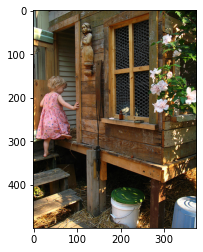

['un niño en un vestido rosa está subiendo por una escalera en una puerta de entrada', 'una niña de entrar en un edificio de madera', 'una pequeña muchacha que sube en una casa de juegos de madera', 'una niña que sube las escaleras su teatro', 'una niña en un vestido rosa de entrar en una cabina de madera']


In [17]:
# Verificamos que la información sea correcta
# (Que las imágeens estén bien asociadas a sus descripciones)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for Id in Image_IDs[:1]:
    #Verificar datos imprimiendo cada imagen y su correspondiente
    # set de descripciones (Buscar imshow y imread)
    print(Id)
    img = mpimg.imread('D:\Documentos\Lenguaje natural\Flicker8k_Dataset/' + Id + '.jpg')
    imgplot = plt.imshow(img)
    plt.show()
    print(Diccionario_Descripciones[Id])

In [18]:
#Limpiamos texto sin spacy
import string
Clean_Global_descriptions = Global_descriptions
# Creamos una tabla para remoción de signos de puntuación
table = str.maketrans('', '', string.punctuation)
for key, desc_list in Global_descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        # Tokenización sin spacy, es una lista solo en base a espacios
        desc = desc.split()
        # Convertimos todo a minúsculas
        desc = [word.lower() for word in desc]
        # Removemos signos de puntuación usando el metodo str.maketrans
        desc = [w.translate(table) for w in desc]
        # Conservar tokens a partir de 2 caracteres
        desc = [word for word in desc if len(word)>1]
        # Remover tokens que tienen números en ellos (Función para detectar solo números)
        desc = [word for word in desc if word.isalpha()]
        # Convertir nuevamente el texto en String (Destokenizar en este contexto qeu ya no sea una lista) y lo guardamos en un nuevo diccionario
        Clean_Global_descriptions[key][i] = ' '.join(desc)

In [ ]:
# Descripciones limpias en el diccionario
for key in Clean_Global_descriptions.keys():
    for text in Clean_Global_descriptions[key]:
        print(key + ' ' + text)

In [20]:
# Convertir las descripciones obtenidas anteriormente en un vocabulario de palabras diferentes
# Generar una lista con todas las palabras / tokebs, de todas las descripciones 
all_desc = set()
for key in Clean_Global_descriptions.keys():
    [all_desc.update(d.split()) for d in Clean_Global_descriptions[key]]
vocabulary = all_desc

print('Palabras en el vocabulario: ' + str(len(vocabulary)))

Palabras en el vocabulario: 9877


In [21]:
# Guardar las descripciones en un nuevo archivo (Una descripción por línea) para emparejarlo con el de imagenes en una lista 
#para poder escribirlo en un archivo txt
Textos = list()
for key, desc_list in Clean_Global_descriptions.items():#
    for desc in desc_list:
        Textos.append(key + ' ' + desc)

# Preparamos la info para ser un nuevo archivo .txt
data = '\n'.join(Textos)
with open('descripciones_Espanol.txt', 'w', encoding="utf-8") as file:
    file.write(data)

## Inciso C) Cargar información ya procesada y generar el archivo de descripciones

In [5]:
# Cargar información de archivo ya existente
from pickle import load

# Cargamos las características desde nuesto archivo pkl
features = load(open('features_Espanol_V2.pkl', 'rb'))
 
# Cargamos la lista predefinida de los identificadores de imágenes
train = list()
with open('descripciones_Espanol.txt', 'r') as file:
    text = file.read()
    for desc in text.split('\n'):
        if desc.split()[0] not in train:
            train.append(desc.split()[0])
print('Elementos en Dataset (Descripciones): %d' % len(train))

Elementos en Dataset (Descripciones): 8091


In [6]:
# Cargamos en memoria las descripciones ya limpias de las imágenes
train_descriptions = dict()
with open('descripciones_Espanol.txt', 'r') as file:
    text = file.read()
    for desc in text.split('\n'):
        Text = desc.split()[1:]
        Id = desc.split()[0]
        # Tokenizamos el texto
        tokens = Text
        # Separamos el ID de la descripción
        image_id, image_desc = Id, tokens
        # Creamos una lista para cada imagen que aún no tenga descripción
        if image_id not in train_descriptions:
            train_descriptions[image_id] = list()
        # Agregamos "tags" para indicar el inicio y el final de cada descripción
        # y destokenizamos la frase para convertirla nuevamente en un String
        description = 'startseq ' + ' '.join(image_desc) + ' endseq'
        # Agregamos cada descripción con tags a la lista
        train_descriptions[image_id].append(description) 
print('Descripciones ya juntas por cada ID: train = ' + str(len(train_descriptions)))

# Obtenemos las características de las imágenes para cada Id en el train y hacemos un diccionario
train_features = {k: features[k] for k in train}
print('Imágenes con Características: train = ' + str(len(train_features)))

Descripciones: train = 8091
Imágenes / Características: train = 8091


In [7]:
from keras.preprocessing.text import Tokenizer

# Crear un tokenizador para ajustar cada línea (descripción)
all_desc = list()
for key in train_descriptions.keys():
    [all_desc.append(d) for d in train_descriptions[key]]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_desc)

# Guardar el "tokenizer" en el archivo
dump(tokenizer, open('tokenizer_espanol.pkl', 'wb'))

vocab_size = len(tokenizer.word_index) + 1
print('Tamaño del vocabulario: %d' % vocab_size)

Tamaño del vocabulario: 9880


In [10]:
# Calculamos la longitud máxima de descripción
lines = all_desc
max_length = max(len(d.split()) for d in lines)

print('La descripción más larga tiene ' + str(max_length) + ' palabras')

La descripción más larga tiene 43 palabras


## Inciso D) Decoders de secuencia de descripción

In [8]:
from IPython.display import clear_output
# Crear la secuencia de imágenes, con su secuencia de entrada y palabras de salida (Para cada imagen)
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size, examples):
    x = 0
    X1, X2, y = list(), list(), list()
    # Recorremos cada imagen (ID y descripción)
    for key, desc_list in descriptions.items():
        if x < examples:
            x += 1
            clear_output(wait = True)
            print('Trabajando en imagen: ' + str(x) + '/' + str(examples))
            # Recorremos cada descripción para la imagen
            for desc in desc_list:
                # Creamos el encoder de la secuencia (Text to sequences)
                seq = tokenizer.texts_to_sequences([desc])[0]
                # Cada secuencia la searamos en una entrada X y una salida y
                for i in range(1, len(seq)):
                    # Separamos la entrada de la salida
                    in_seq, out_seq = seq[:i], seq[i]
                    # Creamos el encoder de entrada (Pad sequences)
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # Creamos el encoder de salida (To categorical)
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # Almacenamos la información en las 3 listas definidas:
                    # X1: ID de la imagen
                    # X2: Decoder de descripción de entrada
                    # X3: Decoder de descripcioón de salida (Basado en el vocabulario global)
                    X1.append(photos[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
    return array(X1), array(X2), array(y)

## Inciso E) Definición y entrenamiento del modelo de Red Neuronal

In [11]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding #usamos el embeddings definido de keras no lo hacemos
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# Definimos el modelo
def define_model(vocab_size, max_length):
    # Capas del modelo de extracción de características que en este caso son 4096
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    # Utilizar la activación ReLu
    fe2 = Dense(256, activation='relu')(fe1)
    # Modelo secuencial
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
    # Decodificación. juntamos las salidas de la parte de imagenes fe2 y palabras se3
    decoder1 = add([fe2, se3])
    # Utilizar activación ReLu
    decoder2 = Dense(256, activation='relu')(decoder1)
    # Activación Softmax
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # Empatador de entradas (Imagen, Sequencia) y (Palabra)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    # Entropía categórica
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # Descripción del modelo
    print(model.summary())
    #plot_model(model, to_file='model.png', show_shapes=False)
    return model

# define the model
model = define_model(vocab_size, max_length)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 43)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 43, 256)      2529280     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [12]:
# Almacenar la evolución del modelo (Para curvas de eficiencia Vs Costo)¡¡Solo guarda la mejor opcion ya sea en accuracy o perdida
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [14]:
# Generamos nuestros conjuntos de datos
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size, 1000)

Trabajando en imagen: 1000/1000


#Entrenamos el modelo con nuestras entradas y salidas, 80% para entrenamiento y 20% para validación
model.fit([X1train, X2train], ytrain, epochs=20, verbose=1, callbacks=[checkpoint], _____=0.2)

## Inciso F) Prueba de Imagen de ejemplo

In [19]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    modelV = VGG16()
    # re-structure the model
    modelV.layers.pop()
    modelV = Model(inputs=modelV.inputs, outputs=modelV.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = modelV.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length_try):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word en base a photo
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer, escogemos la del valor mas alto
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [20]:
from keras.models import load_model
from pickle import load

# load the tokenizer
tokenizer = load(open('tokenizer_espanol.pkl', 'rb'))
# pre-define the max sequence length (from training)
# Longitud máxima debe ser igual al máximo de palabras
max_length = 43
# load the model

model = load_model('model-ep004-loss2.997-val_loss3.525.h5')

C:\Users\mario\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


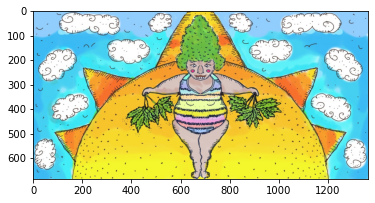

Descripción:  un niã±o pequeã±o en un traje de baã±o está de pie en un banco de la calle 


In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences


# pre-define the max sequence length (from training)
max_length_try = max_length
# load and prepare the photograph
photo = extract_features('C:/Users/mario/Pictures/Makoma1.jpg')

img=mpimg.imread('C:/Users/mario/Pictures/Makoma1.jpg')
imgplot = plt.imshow(img)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length_try)
# Eliminar los tags de entrada y de salida
description = description.replace('startseq', '').replace('endseq', '')
# Manejo de acentos
description = description.replace('ã³', 'ó').replace('ã¡', 'á')
clear_description = description

for palabra in description.split():
    clear_description = clear_description.replace(palabra + ' ' + palabra, palabra)

print('Descripción: ' + clear_description)

## Inciso G) Evaluación BLEU del modelo

In [24]:
from nltk.translate.bleu_score import corpus_bleu
from IPython.display import clear_output

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    x = 0
    actual, predicted = list(), list()
    # Recorrer todo el set completo
    for key, desc_list in descriptions.items():
        x += 1
        clear_output(wait = True)
        print('Trabajando en : ' + str(x) + '/' + str(len(descriptions)))
        # Generar descripción
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
            
    # calculate BLEU score, analisis por palabras bigramas o trigramas o cuatrigrams
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [25]:
features = dict()
# Cargar el archivo de características de las imágenes
def load_photo_features(filename, dataset):
    # Cargamos todas las características
    all_features = load(open(filename, 'rb'))
    # Filtramos las características
    for k in dataset:
        try:
            features[k] = all_features[k]
        except KeyError:
            True
    return features

In [26]:
# Extraemos las descripciones
test_descriptions = dict()
with open('descripciones_Espanol.txt', 'rb') as file:
    text = file.read()
    for desc in text.decode().split('\n'):
        Id = desc.split()[0]
        if Id not in test_descriptions:
            test_descriptions[Id] = list()
        test_descriptions[Id].append(desc.replace(desc.split()[0] + ' ', ''))

# Extraer las características de las fotos
all_features = load(open('features_Espanol_V2.pkl', 'rb'))


evaluate_model(model, test_descriptions, all_features, tokenizer, max_length)

Trabajando en : 8091/8091
BLEU-1: 0.400216
BLEU-2: 0.234742
BLEU-3: 0.151756
BLEU-4: 0.066535
